# Numerical analysis for Haque, Çetiner, Gunawardea 2024. _Anomalous behavior of the Steinberg signature for detecting departure from thermodynamic equilibrium._

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from steinberg_utils_3vertex import *

# Plot features

In [2]:
# plot formatting
plt.rc("text", usetex=False) # renders LaTeX more quickly
plt.rc("font", family = "serif",size=14) # font specifications
plt.rc("figure",figsize=(14,12)) # figure size
%config InlineBackend.figure_format = 'retina' # retina-display quality

In [3]:
# hex codes

# black
black = '#000000'

# strawberry pink (A^{13})
strawberrypink = '#FF3D6E'

# sky blue (A^{31})
skyblue = '#4599DF'

# Sampling parameters for the 3-vertex graph $K$

![My Image](steinberg_figure_1.png)

Parameters are defined as $10^x$, where $x$ is uniformly sampled from $(-3, 3)$. The user can specify the endpoints of this range to sample parameter space more broadly, but $-3$ and $3$ are set as the default parameters.

In [4]:
params_x = random_parameters()

The parameters can be determined such that they satisfy the cycle condition on $K$, initializing the graph in an equlibrium steady state.

In [5]:
params = equilibrium_parameters()

To generate the figure in the paper, we will manually assign values for the edge labels of the 3-vertex graph. The parameters for the 3-vertex graph are listed in the following order: $[a, b, d, c, f, e]$

In [6]:
params = [0.00206, 2.69641, 0.2113, 0.58195, 0.35186, 0.0015]

Next, we compute the Laplacian matrix $\mathcal{L}(K)$ for this specific parameterzation of $K$, and the steady state distribution $\pi(K)$ as computed through the Matrix-Tree Theorem.

In [7]:
L = Laplacian_K(params)
print(L)

[[-3.53920e-01  2.69641e+00  1.50000e-03]
 [ 2.06000e-03 -2.90771e+00  5.81950e-01]
 [ 3.51860e-01  2.11300e-01 -5.83450e-01]]


In [8]:
pi = steady_state_MTT(params)
print(pi)

[0.56136688 0.07347964 0.36515348]


We can also calculate the cycle affinity $\tilde{A}(C)$ for $K$. The cycle affinity  quantifies the departure from equilibrium that arises from the cycle $C$. We take the absolute value of the cycle affinity in our calculation.

In [9]:
cycle_affinity_K(params)

13.647844424688195

# Numerical calculation of the autocorrelation function $\mathcal{A}^{\alpha,\beta}(\tau)$

Recall the linear framework formula for the asymmetric autocorrelation function $\mathcal{A}^{\alpha,\beta}(\tau)$, specified in the text by Eq. 20,

$$ \mathcal{A}^{\alpha,\beta} (\tau) = (S^\beta)^T \cdot \exp\left (\mathcal{L}(G) \tau \right ) \cdot \Delta \left ( u^*(G) \right ) \cdot S^\alpha $$

where $S$ denotes the column vector $S = \left ( S(1), \cdots , S(N) \right )^T$ and $S^k$ is taken component-wise. The Steinberg signature exploits the discrepancy between $\mathcal{A}^{\alpha,\beta} (\tau)$ and $\mathcal{A}^{\beta,\alpha} (\tau) = \mathcal{A}^{\alpha,\beta}_r (\tau)$ to detect whether a stochastic system is away from thermodynamic equilibrium. To assess the efficacy of the Steinberg signature, we must be able to compute the autocorrelation function numerically.

Let us define the values of our stochastic signal $f(t)$. Here, we define $f(t)$ so it takes one of the values $S(1) = 3, S(2) = 5, S(3) = 7$ when the system occupies state $1$, $2$, or $3$, respectively. We also take $\alpha = 1$ and $\beta = 3$, as in the text.

In [10]:
signal = [3, 5, 7]
alpha = 1
beta = 3

Next, we set a range for the $\tau$ values -- this range can be altered depending on the shape of the autocorrelation functions. Recall that $\mathcal{A}^{\alpha,\beta}(0) = \mathcal{A}^{\beta, \alpha}(0) = \langle S^{\beta + \alpha} \rangle$ and $\lim_{\tau \to \infty} \mathcal{A}^{\alpha,\beta}(\tau) = \lim_{\tau \to \infty} \mathcal{A}^{\alpha,\beta}(\tau) = \langle S^\beta \rangle \langle S^\alpha \rangle$.

In [11]:
tau = np.around(np.arange(0.01,4.0,step=.01), decimals = 2)

We can now numerically compute the asymmetric autocorrelation functions by taking all the above defined quantities and plugging them into the formula reproduced above. The function `asymmetric_autocorrelation` performs this calculation for us.

In [12]:
a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha,beta)

In [13]:
area = numerical_area(a_13, a_31)
area

1634.4749826598426807

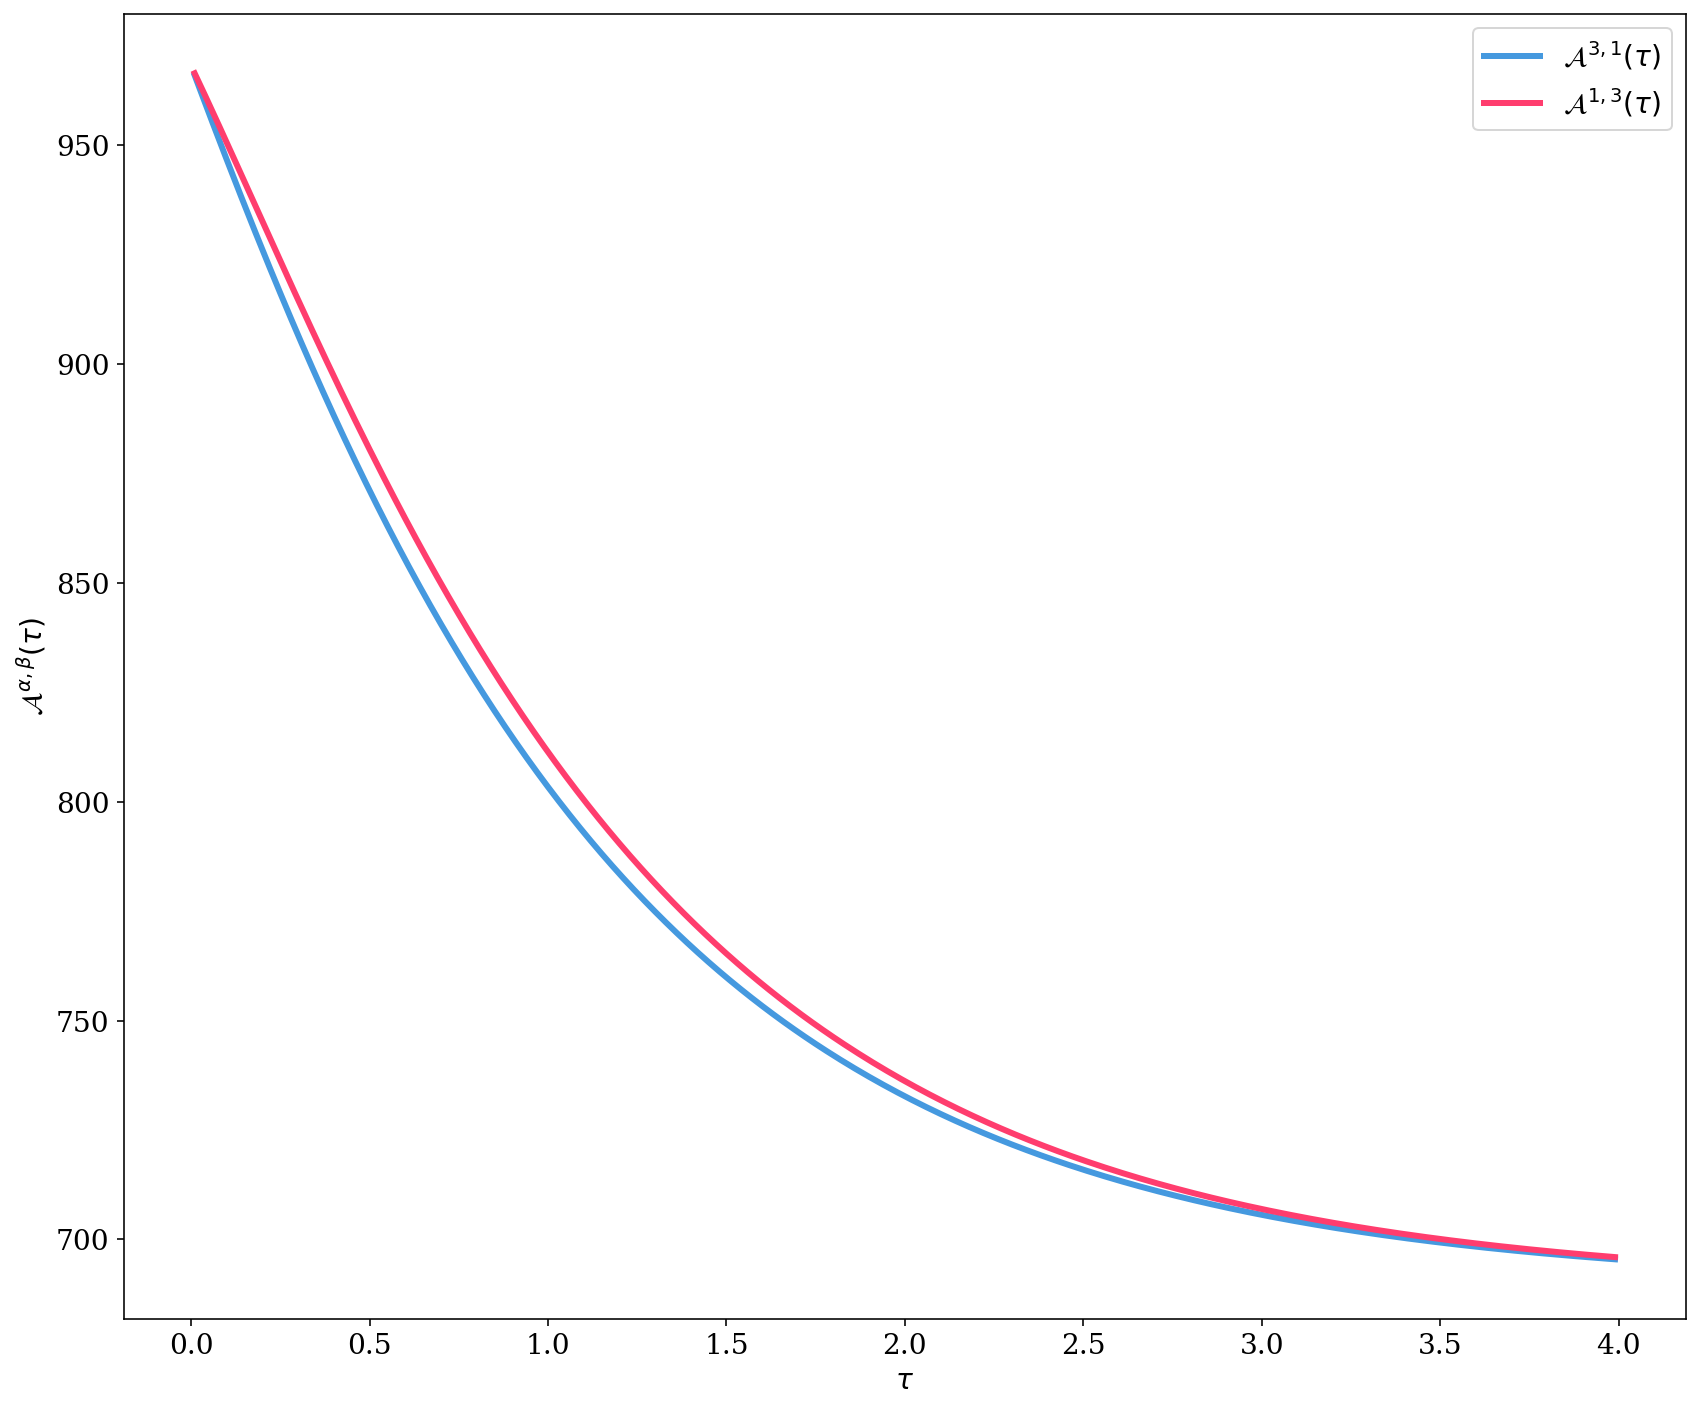

In [14]:
fig = plt.figure()
plt.plot(tau,a_13,label=r'$\mathcal{A}^{3,1}(\tau)$',linewidth=3, c= skyblue)
plt.plot(tau,a_31,label=r'$\mathcal{A}^{1,3}(\tau)$',linewidth=3,color=strawberrypink)
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\mathcal{A}^{\alpha,\beta}(\tau)$")
plt.legend()
plt.show()
fig.savefig('figure_3A_legend.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

# The Steinberg signature $\mathcal{I}^{1,3}(G)$ in response to increasing entropy production

We can think of the area difference between $\mathcal{A}^{\alpha,\beta}(\tau)$ and $\mathcal{A}^{\beta,\alpha}(\tau)$ as an indirect measure of quantifying the Steinberg signature, given in the text by Eq. 30,

$$ \mathcal{I}^{\alpha,\beta}(G) = \int_0^\infty \left ( \mathcal{A}^{\alpha,\beta}(\tau) - \mathcal{A}^{\beta,\alpha}(\tau) \right ) d \tau .$$

We call $\mathcal{I}^{\alpha,\beta}(G)$ the Steinberg signature for a given linear framework graph $G$ and signals $S(i)$. The goal of the present work is to assess the mathematical behavior of $\mathcal{I}^{\alpha,\beta}(G)$ and evaluate its efficacy as a signature of departure from equilibrium. In this section, we will investigate how the Steinberg signature behaves in response to increasing entropy production in the underlying system. We look into this by initializing $K$ in an equilibrium steady state, then selecting a single transition rate in $K$ to increase from its equilibrium value. We can then plot the value of the Steinberg signature against the value of the cycle affinity as it increases from $0$ to observe how the Steinberg signature varies in response to increasing entropy production. 

In the paper, we derive several analytical formulas for $\mathcal{I}^{\alpha,\beta}(G)$. Here, we numerically estimate $|\mathcal{I}^{\alpha,\beta}(G)|$ both by using the Python functions for computing the area underneath the curve and by using the spectral formulas for $\mathcal{I}^{\alpha,\beta}(G)$ supplied in Eq. 32. 

First, we define the starting parameters for $K$.

In [16]:
params = equilibrium_parameters()
cycle_affinity_K(params)

0.0

As before, we manually define the starting equilibrium parameterization to recreate Figure 3B in the paper.

In [15]:
params = [8.8154536, 7.20897351, 5.83306234, 0.59209293, 8.77612202, 0.72849181]
cycle_affinity_K(params)

5.718925793740141e-09

We next define the conditions for calculating the higher-order autocorrelation functions as above. We also will initialize arrays for storing information about the cycle affinity and the Steinberg signature. Let us choose to perturb the chosen parameter 2000 times (such that K is driven very far away from equilibrium).

In [18]:
signal = [3,5,7]
tau = np.around(np.arange(0.01,2.0,step=.01), decimals = 2)
alpha = 1
beta = 3

num_perturbations = 2000

In [19]:
# arrays for force/area tracking
entropy_production = np.zeros(num_perturbations)
steinberg_area = np.zeros(num_perturbations)

We can compute the area between $\mathcal{A}^{1,3}(\tau)$ and $\mathcal{A}^{3,1}(\tau)$ numerically using the Python functions for the area under the curve. This function takes the absolute value of the area function.

In [415]:
area = numerical_area(a_13,a_31)
area

1634.4749826598267077

In [ ]:
for i in tqdm(range(1,num_perturbations)):
    params[param_choice] = params[param_choice]*1.01

    affinities[i] = cycle_affinity_K(params)

    L = Laplacian_K(params)
    pi = steady_state_MTT(params)

    a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)

    areas[i] = numerical_area(a_13,a_31)

In [14]:
num_simulations = 6
num_perturbations = 2000
num_params = 6

mega_affinities = np.zeros((num_simulations,num_perturbations))
mega_areas = np.zeros((num_simulations,num_perturbations))
param_choices = np.arange(0,6)

In [15]:
for j in range(num_simulations):
    
    # arrays for force/area tracking
    affinities = np.zeros(num_perturbations)
    areas = np.zeros(num_perturbations)
    
    # reset the initial equilibrium parameters
    params = [8.8154536, 7.20897351, 5.83306234, 0.59209293, 8.77612202, 0.72849181]
    
    # determine which parameter to perturb from its equilibrium value
    param_choice = param_choices[j]
    
    # equilibrium conditions
    affinities[0] = cycle_affinity_K(params)
    L = Laplacian_K(params)
    pi = steady_state_MTT(params)
    
    a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)
    areas[0] = numerical_area(a_13, a_31)
    
    for i in tqdm(range(1,num_perturbations)):
        params[param_choice] = params[param_choice]*1.01

        affinities[i] = cycle_affinity_K(params)

        L = Laplacian_K(params)
        pi = steady_state_MTT(params)

        a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)

        areas[i] = numerical_area(a_13,a_31)
    
    mega_affinities[j,] = affinities
    mega_areas[j,] = areas

100%|███████████████████████████████████████| 1999/1999 [03:32<00:00,  9.42it/s]


In [16]:
colors = [black, strawberrypink, skyblue]

In [17]:
idx = np.argmax(mega_areas,axis=1)
print(idx)
print(mega_areas[np.arange(num_simulations), idx])
print(mega_affinities[np.arange(num_simulations), idx])

[141 130 104 266  97 259]
[17.81377783 15.4253533  10.50005619 76.39676393  9.37993193 70.45882645]
[1.40299664 1.29354302 1.0348344  2.64678801 0.9651821  2.57713569]


In [18]:
paramchoice_labels = ['a','b','d','c','f','e']

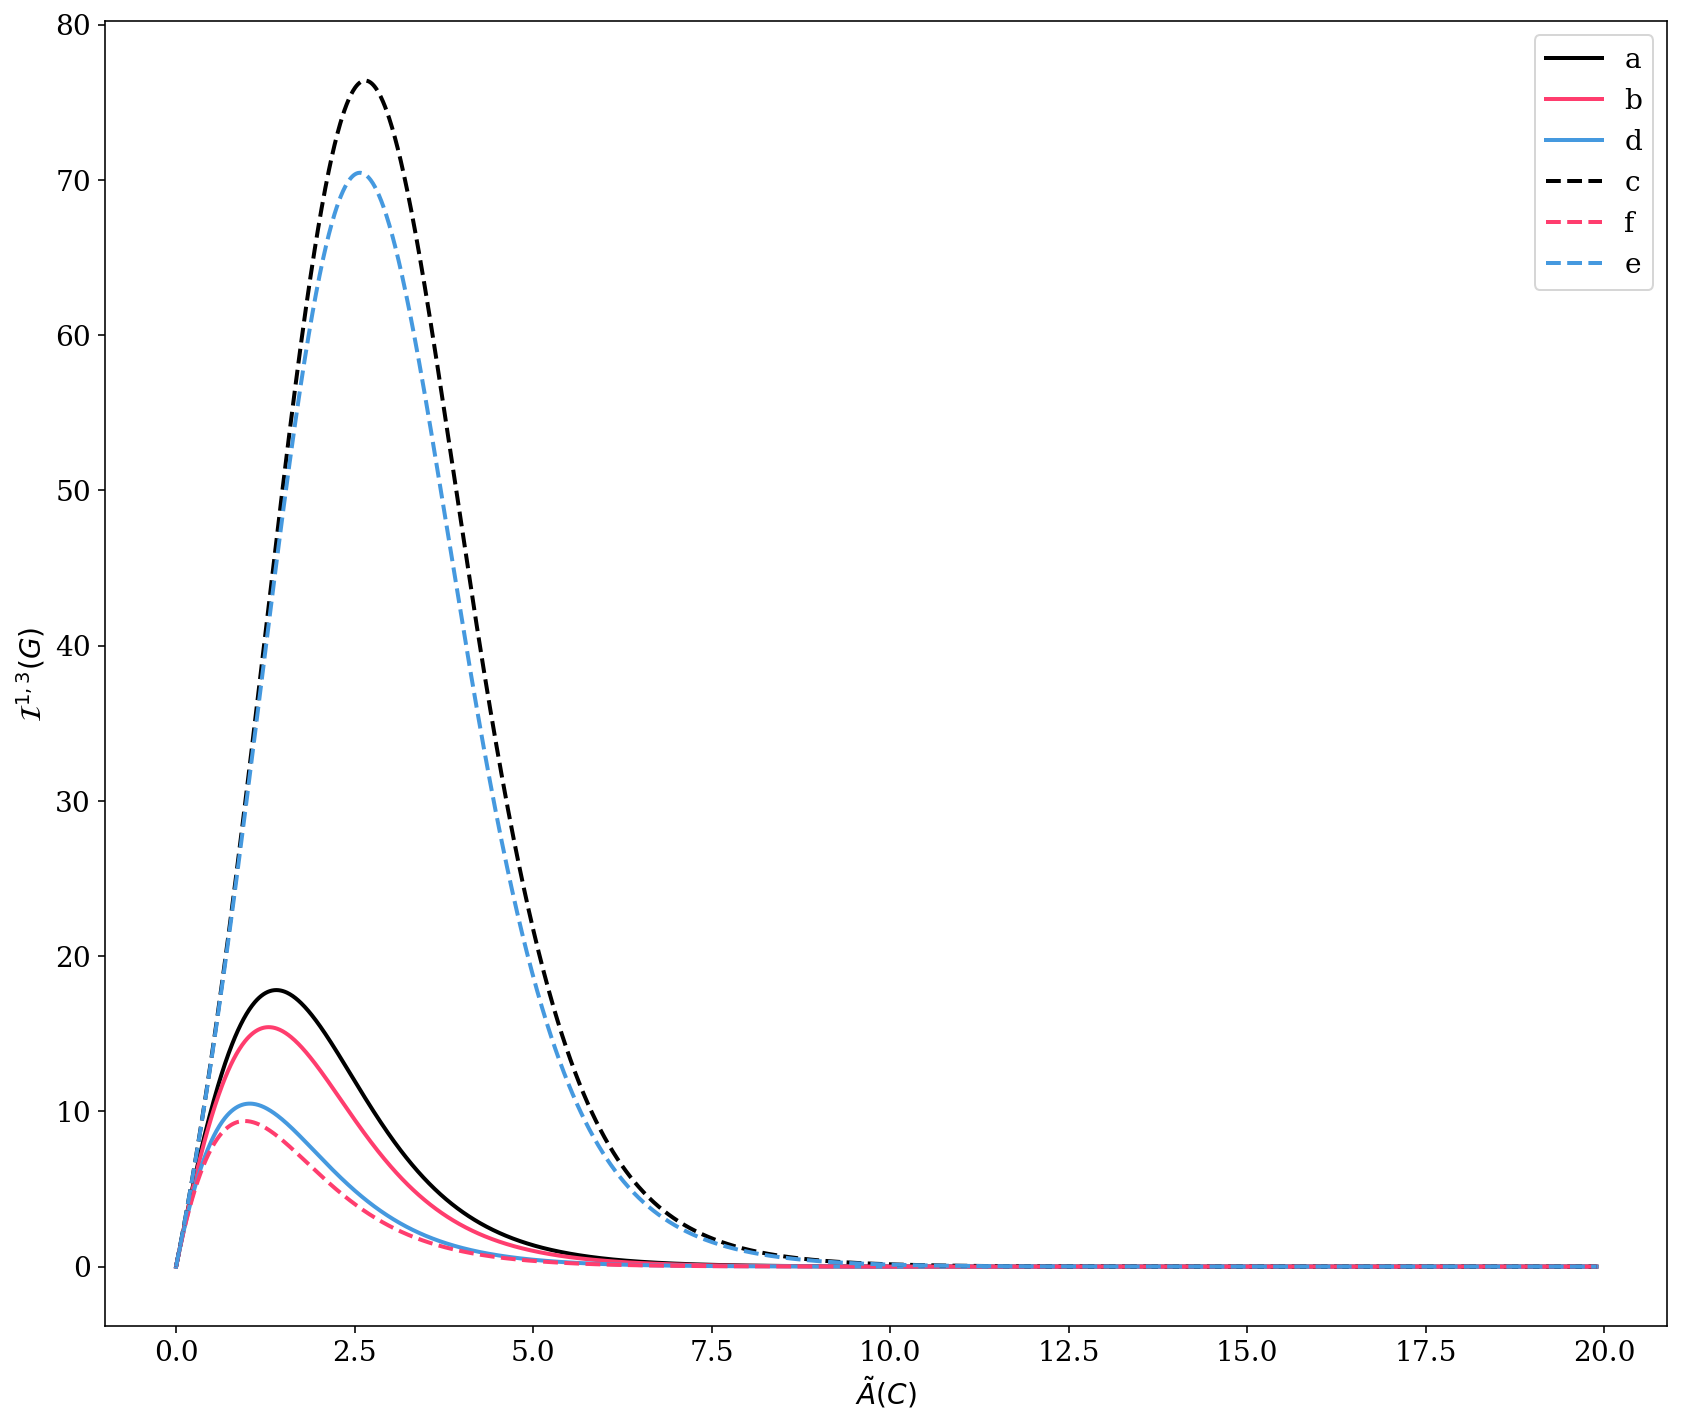

In [19]:
fig, ax = plt.subplots(figsize = (14, 12))
for i in range(0,3):
    plt.plot(mega_affinities[i,:], mega_areas[i,:],label=(paramchoice_labels[i]),color = colors[i],linewidth=2)
    
for i in range(3,6):
    plt.plot(mega_affinities[i,:], mega_areas[i,:], '--', label=(paramchoice_labels[i]),color = colors[i-3],linewidth=2)
    
plt.legend()
plt.xlabel(r"$\tilde{A}(C)$")
plt.ylabel(r"$\mathcal{I}^{1,3}(G)$")
plt.show()
fig.savefig('forcearea-1-allparams-redone.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

# The Steinberg signature on more complex graphs

To interrogate the behavior of the Steinberg signature on more complicated linear framework graphs, we make use of the `general_graphs` library. Here we provide a work-flow for creating random graphs, setting them at equilibrium, and assessing the Steinberg signature's behavior in response to increasing entropy production.

In [1]:
from general_graph_utils import *

## 1. Create a general graph with a random number of nodes and randomly assigned edges.

First, decide the maximum number of nodes you want in your graph. Set that number as `n`. Then, define a directed graph `G` and an undirected graph `G_ud` as the outputs of the function `random_graph(n)`. `random_graph(n)` picks a random number between 2 and `n` to be the size of the graph, adds that many nodes to the graph, and then randomly assigns edges between the nodes such that the resulting graph is strongly connected and fully reversible. It is necessary to have a directed and undirected version of the graph for the various functions that we will use going forward.

In [2]:
n=10
G,G_ud = random_graph(n)

In [3]:
print(G)
print(G_ud)

DiGraph with 7 nodes and 36 edges
Graph with 7 nodes and 18 edges


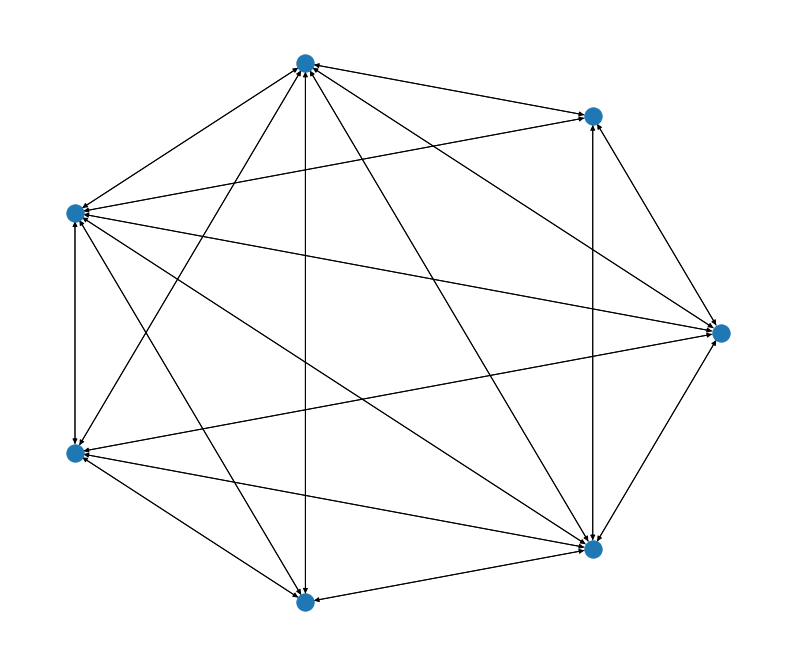

In [4]:
fig, ax = plt.subplots(figsize = (14, 12))
nx.draw(G, pos=nx.circular_layout(G))

## 2. Create data structures containing the graph's structural information.

Next, we will obtain structural information from the graph $G$ and assign this information to certain data structures. These data structures are important as they will be used to compute the cycle affinity for each cycle in the graph.

`node_list`: a NumPy array of the nodes in $G$.

In [6]:
node_list = get_nodes(G)
print(node_list)

[1 2 3 4 5 6 7]


`edge_list`: a NumPy array of the edges in $G$. Each directed edge $i \to j$ between vertices $i$ and $j$ is represented as a list `[i j]`

In [7]:
edge_list = get_edges(G)
print(edge_list)

[[1 3]
 [1 5]
 [1 7]
 [1 2]
 [1 4]
 [2 3]
 [2 1]
 [2 4]
 [2 7]
 [3 1]
 [3 2]
 [3 4]
 [3 5]
 [3 6]
 [3 7]
 [4 3]
 [4 2]
 [4 7]
 [4 1]
 [4 5]
 [4 6]
 [5 4]
 [5 3]
 [5 1]
 [5 6]
 [5 7]
 [6 4]
 [6 5]
 [6 3]
 [6 7]
 [7 3]
 [7 5]
 [7 2]
 [7 6]
 [7 1]
 [7 4]]


To define edge labels for $G$, we use the following algorithm. If G is not labeled, the labels are logarithmically sampled from the range $(10^{-3},10^3)$. Replace `np.around(10**(np.random.uniform(-3,3, size = 1)[0])` with `1.0` in the `elif` condition for troubleshooting purposes.

The function returns the following data structures.

`label_dict`: a dictionary matching each edge to its corresponding label. The keys are the edges (listed as a tuple $(i,j)$ for each directed edge $i\to j$ and the values are the associated labels.

`label_list`: a NumPy array containing a list of the labels in $G$. The order is the same as in `edge_list`, which can be confirmed from `label_dict`

In [8]:
def get_labels(G):
    """
    Extracts the label information for each edge in a NetworkX graph object. If G not labeled, labels are logarithmically sampled.
    
    Note: works for undirected graph, but if given a choice, better to use a directed graph
    
    Parameters
    ----------
    G : NetworkX graph object (directed)
            
    Returns
    -------
    label_dict : dictionary
        keys: edges in G represented as tuple (source,sink), values: edge labels
        
    label_list : 1D numpy array
        list of edge labels in G
        
    """
    
    label_dict = {}
    
    if nx.is_weighted(G)==True:
        for i in range(len(G.edges())):
            label_dict[list(G.edges())[i]] = G.get_edge_data(list(G.edges)[i][0],list(G.edges)[i][1])['weight']
        
    elif nx.is_weighted(G)==False:
        label_dict = {e: 1.0 for e in G.edges}
        # np.around(10**(np.random.uniform(-3,3, size = 1)[0]),decimals=5)
        
    label_list = np.fromiter(label_dict.values(), dtype=float)
    
    return label_dict, label_list

In [9]:
label_dict, label_list = get_labels(G)

In [10]:
print(label_dict)

{(1, 3): 1.0, (1, 5): 1.0, (1, 7): 1.0, (1, 2): 1.0, (1, 4): 1.0, (2, 3): 1.0, (2, 1): 1.0, (2, 4): 1.0, (2, 7): 1.0, (3, 1): 1.0, (3, 2): 1.0, (3, 4): 1.0, (3, 5): 1.0, (3, 6): 1.0, (3, 7): 1.0, (4, 3): 1.0, (4, 2): 1.0, (4, 7): 1.0, (4, 1): 1.0, (4, 5): 1.0, (4, 6): 1.0, (5, 4): 1.0, (5, 3): 1.0, (5, 1): 1.0, (5, 6): 1.0, (5, 7): 1.0, (6, 4): 1.0, (6, 5): 1.0, (6, 3): 1.0, (6, 7): 1.0, (7, 3): 1.0, (7, 5): 1.0, (7, 2): 1.0, (7, 6): 1.0, (7, 1): 1.0, (7, 4): 1.0}


In [11]:
print(label_list)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


To define a cycle basis, we take advantage of the NetworkX function `nx.cycle_basis`. More information can be found here: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cycles.cycle_basis.html

`cycle_list`: a list of lists of the nodes involved in each cycle in $G$. Note that the undirected version of $G$ is needed as a parameter for this function.

In [12]:
def get_cycle_nodes(G_ud):
    """
    Returns a list of the cycles which form a basis G (must be undirected). Each element is a list of the nodes connected in a given cycle.
    
    Parameters
    ----------
    G_ud : NetworkX graph object (undirected)
            
    Returns
    -------
    cycle_list : list of lists
        each element is a list of the nodes connected in a given cycle.
    """
    
    cycle_list = [c for c in nx.cycle_basis(G_ud)]
    
    return cycle_list

In [13]:
cycle_list = get_cycle_nodes(G_ud)
num_cycles = len(cycle_list)
print(cycle_list)

[[3, 4, 1], [2, 4, 1], [5, 4, 1], [7, 4, 1], [5, 6, 4], [3, 6, 4], [7, 6, 4], [3, 2, 1], [7, 2, 1], [3, 7, 1], [5, 7, 1], [3, 5, 1]]


Going forward, it will be useful to know which edges (and their corresponding labels) are associated with specific cycles. The following algorithm creates data structures that hold this information.

`cycle_edges_forward`: a list of lists where each element is a list of the edges going around one direction ("forward") of a given cycle

`cycle_edges_backward`: a list of lists where each element is a list of the edges going around the opposite direction ("backward") of a given cycle

`cycle_labels_forward`: a list of lists where each element is a list of the labels associated with the forward edges

`cycle_labels_backward`: a list of lists where each element is a list of the labels associated with the backward edges

In [14]:
def get_cycle_labels_edges(cycle_list,label_dict):
    """
    Extracts, for each cycle, the edges involved and their respective edge labels.
    
    Parameters
    ----------    
    cycle_list : list of lists
        each element is a list of the nodes connected in a given cycle.
        
    label_dict : dictionary
        keys: edges in G represented as tuple (source,sink), values: edge labels
        
    Returns
    -------
    cycle_edges_forward : list of lists
        each element is a list of the edges going around one direction of a given cycle
    
    cycle_edges_backward : list of lists
        each element is a list of the edges going around the opposite direction of a given cycle
    
    cycle_labels_forward : list of lists
        each element is a list of the labels going around one direction of a given cycle
    
    cycle_labels_backward : list of lists
        each element is a list of the labels going around the opposite direction of a given cycle
        
    """
    
    # define number of cycles
    num_cycles = len(cycle_list)
    
    # define arrays for edges in each direction
    cycle_edges_forward = [[] for i in range(num_cycles)]
    cycle_edges_backward = [[] for i in range(num_cycles)]
    
    # define arrays for labels in each direction
    cycle_labels_forward = [[] for i in range(num_cycles)]
    cycle_labels_backward = [[] for i in range(num_cycles)]

    # iterate over each cycle
    for j in range(num_cycles):
        
        for i in range(1,len(cycle_list[j])):
            
            source = cycle_list[j][i-1]
            sink = cycle_list[j][i]
            
            # edge (source,sink) and accompanying labels
            cycle_labels_forward[j].append(label_dict.get((source,sink)))
            cycle_edges_forward[j].append((source,sink))
            
            #edge (sink, source) and accompanying labels
            cycle_labels_backward[j].append(label_dict.get((sink,source)))
            cycle_edges_backward[j].append((sink,source))
        
        # account for the connection between the last and first elements of each cycle list
        final_source = cycle_list[j][-1]
        final_sink = cycle_list[j][0]

        # edge (final_source, final_sink) and accompanying labels
        cycle_labels_forward[j].append(label_dict.get((final_source,final_sink)))
        cycle_edges_forward[j].append((final_source,final_sink))
        
        # edge (final_sink, final source) and accompanying labels
        cycle_labels_backward[j].append(label_dict.get((final_sink,final_source)))
        cycle_edges_backward[j].append((final_sink,final_source))
        
    return cycle_edges_forward, cycle_edges_backward, cycle_labels_forward, cycle_labels_backward

In [15]:
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)

In [16]:
print(cycle_edges_forward)
print(cycle_edges_backward)

[[(3, 4), (4, 1), (1, 3)], [(2, 4), (4, 1), (1, 2)], [(5, 4), (4, 1), (1, 5)], [(7, 4), (4, 1), (1, 7)], [(5, 6), (6, 4), (4, 5)], [(3, 6), (6, 4), (4, 3)], [(7, 6), (6, 4), (4, 7)], [(3, 2), (2, 1), (1, 3)], [(7, 2), (2, 1), (1, 7)], [(3, 7), (7, 1), (1, 3)], [(5, 7), (7, 1), (1, 5)], [(3, 5), (5, 1), (1, 3)]]
[[(4, 3), (1, 4), (3, 1)], [(4, 2), (1, 4), (2, 1)], [(4, 5), (1, 4), (5, 1)], [(4, 7), (1, 4), (7, 1)], [(6, 5), (4, 6), (5, 4)], [(6, 3), (4, 6), (3, 4)], [(6, 7), (4, 6), (7, 4)], [(2, 3), (1, 2), (3, 1)], [(2, 7), (1, 2), (7, 1)], [(7, 3), (1, 7), (3, 1)], [(7, 5), (1, 7), (5, 1)], [(5, 3), (1, 5), (3, 1)]]


In [17]:
print(cycle_labels_forward)
print(cycle_labels_backward)

[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]
[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]


## 3. Calculate the cycle affinity for each cycle in the graph

The cycle affinity is a dimensionless quantity that serves as a measure of thermodynamic force. Mathematically, we define the cycle affinity in the following way. Let $C = i \leftrightharpoons 1 \leftrightharpoons 2 \leftrightharpoons \cdots \leftrightharpoons j \leftrightharpoons i$ represent a cycle of reversible edges in a graph. For any cycle $C$, the cycle affinity $\tilde{A}(C)$ is given by

$$ \tilde{A}(C) = ln \left ( \dfrac{\ell(i\to 1)\ell(1\to 2)\cdots \ell(j \to i)}{\ell(1\to i)\ell(2\to 1)\cdots \ell(i \to j)} \right ) $$

where $\ell(a \to b)$ is the label on the directed edge $a \to b$. To compute this quantity for each cycle in the graph, we must complete the following steps.

1. Calculate the products of edge labels in each direction around each cycle.
2. Take the log of the ratio of the forward and backwards products for each cycle

`products_f`: 1D NumPy array where each element is the product of labels corresponding to the forward traversal of each cycle

`products_b`: 1D NumPy array where each element is the product of labels corresponding to the backward traversal of each cycle

In [18]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)

In [19]:
print(products_f)
print(products_b)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


`total_affinities`: 1D NumPy array where each element is the thermodynamic force for each cycle in the graph, corresponding to their order in cycle_list

In [20]:
total_affinities = calculate_affinities(products_b, products_f, cycle_list)

In [21]:
print(total_affinities)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 3. Calculate the Steinberg signature

The Steinberg signature is a signature of non-equilibrium conditions in Markovian systems. Using higher-order autocorrelation functions of the form $G^{\alpha,\beta}(\tau)$ and $G^{\beta,\alpha}(\tau)$, this method allows one to detect whether or not a given system obeys detailed balance. 

We can use the Steinberg signature to detect if the parameterization of a particular linear framework graph obeys detailed balance or not. The Steinberg signature takes multiple forms, including the following formula.

$$G^{\alpha,\beta}(\tau) = f^\alpha e^{L \tau} f^{* \beta} \pi$$

We will first define some quantities that will pass as variables in the Steinberg function. We will then compute the Laplacian matrix of the graph. Finally, when we have all the requisite components, we can compute the Steinberg signature.

In [38]:
def make_observable(node_list):
    """
    Create the observable vector f for a graph with size num_nodes = len(node_list). The observable vector is a function on the states of the Markov process defined for the linear framework graph: when the system exists in state k, f takes vaue f_k.
    
    Parameters
    ----------
    node_list : 1D array
        list of nodes in the graph
    
    Returns
    -------
    f : 1D array
        list of values that the observable f assumes based on the state the Markov process exists in at a given time t 
    
    """
    
    num_nodes = len(node_list)
    
    f = []
    
    for i in range(0,num_nodes):
        f.append(3+(2*i))
    
    return f

In [39]:
signal = make_observable(node_list)
print(signal)

[3, 5, 7, 9, 11, 13, 15]


In [44]:
s_t = np.array([signal],dtype=np.float128) # row vector
s = s_t.T # column vector

In [45]:
s_t

array([[ 3.,  5.,  7.,  9., 11., 13., 15.]], dtype=float128)

In [46]:
s

array([[ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.]], dtype=float128)

`tau`: a vector of possible values of $\tau$. $\tau$ represents the interval.

In [40]:
tau = np.arange(start=0.01,stop=2.0,step=0.01)

`L`: the Laplacian matrix of the graph

In [41]:
L = Laplacian_all(edge_list, label_list, node_list)
print(L)

[[-5.  1.  1.  1.  1.  0.  1.]
 [ 1. -4.  1.  1.  0.  0.  1.]
 [ 1.  1. -6.  1.  1.  1.  1.]
 [ 1.  1.  1. -6.  1.  1.  1.]
 [ 1.  0.  1.  1. -5.  1.  1.]
 [ 0.  0.  1.  1.  1. -4.  1.]
 [ 1.  1.  1.  1.  1.  1. -6.]]


In [47]:
pi = steady_state_spectrum(L)
np.diag(pi)

array([0.14285714])

`t`: forward higher-order autocorrelation function $G^{\alpha,\beta}(\tau)$

`t_rev`: reverse higher-order autocorrelation function $G^{\beta, \alpha}(\tau)$

In [43]:
%%time
t, t_rev = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 7 is different from 1)

In [387]:
area = np.abs(np.trapz(t)-np.trapz(t_rev))
print(area)

1.0095391189679503441e-10


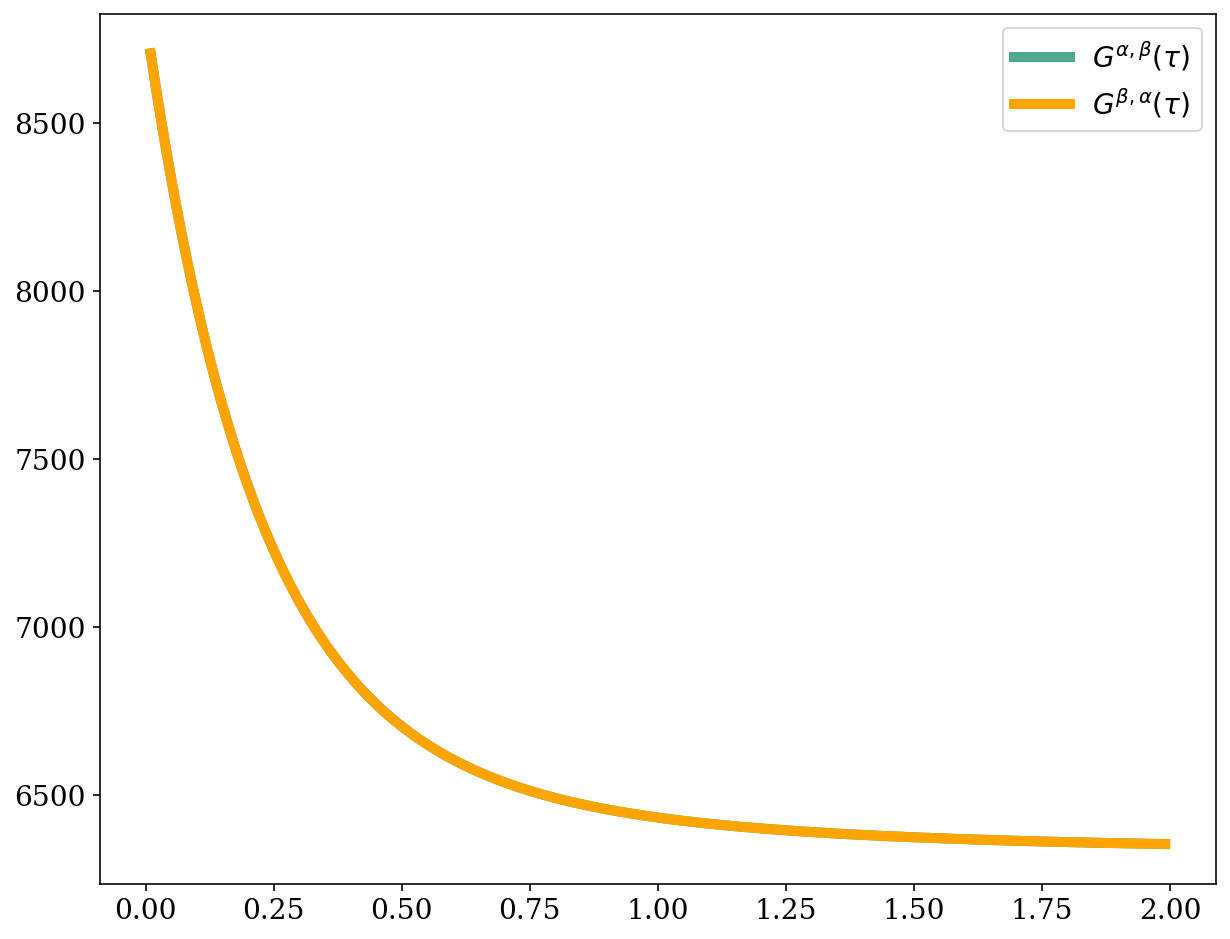

In [388]:
fig = plt.figure()
plt.plot(tau_n,t_rev,color='#4CA98F',linewidth=5,label=r'$G^{\alpha,\beta}(\tau)$')
plt.plot(tau_n,t,c= '#FFA400',linewidth=5,label=r'$G^{\beta,\alpha}(\tau)$')
plt.legend()

## 4. Set the graph in an equilibrium steady state

Linear framework graphs represent biochemical systems. The vertices represent components of a system, and edges are treated as chemical reactions under mass-action kinetics with the labels as rate constants (Gunawardena 2012). The dynamics on this system relaxes to a **steady-state** when $dx/dt = 0$, where $x$ is a column vector of component amounts.

Furthermore, we can define two types of steady-states: equilibrium and non-equilibrium. An equilibrium steady-state is characterized by the lack of net fluxes of matter and energy. Detailed balance holds for each pair of reversible edges, and the cycle affinity for each cycle is equal to 0. 

In [389]:
def initial_equilibrium_parameters(cycle_list,cycle_edges_forward,cycle_labels_forward,cycle_labels_backward):
    """
    Initializes a graph with a particular parameterization in an equilibrium steady state
    
    Parameters
    ----------
    cycle_list : list of lists
        each element is a list of the nodes connected in a given cycle.

    cycle_edges_forward : list of lists
        each element is a list of the edges going around one direction of a given cycle

    cycle_labels_forward : list of lists
        each element is a list of the labels going around one direction of a given cycle
    
    cycle_labels_backward : list of lists
        each element is a list of the labels going around the opposite direction of a given cycle

    Returns
    -------
    
    cycle_labels_forward : list of lists
        updated with new values for certain edges
        
    edge_tracker : list of lists
        list of edges with labels that were changed to initialize the system in an equilibrium steady state
    
    """
    
    num_cycles = len(cycle_list)
    edge_tracker = []
    
    # for each cycle in cycle_list
    for i in range(num_cycles):
        for j in range(len(cycle_list[i])):
            
            # if the edge is already in edge_tracker, move on
            if cycle_edges_forward[i][j] in edge_tracker:
                pass
            
            # otherwise, change the value of one edge in the cycle such that the cycle affinity is 0
            else:
                cycle_labels_forward[i][j] = 1/(np.prod(cycle_labels_forward[i])/(cycle_labels_forward[i][j]*np.prod(cycle_labels_backward[i])))
                
                # add that edge to edge_tracker
                edge_tracker.append(cycle_edges_forward[i][j])
    
    return cycle_labels_forward, edge_tracker

In [390]:
cycle_labels_forward, edge_tracker = initial_equilibrium_parameters(cycle_list,cycle_edges_forward,cycle_labels_forward,cycle_labels_backward)

In [391]:
cycle_labels_forward

[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]

In [392]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[0. 0. 0. 0.]


In [393]:
def reformat_labels(cycle_list, cycle_labels_forward, edge_tracker, label_dict, label_list):
    """
    Initializes a graph with a particular parameterization in an equilibrium steady state
    
    Parameters
    ----------
    
    cycle_list : list of lists
        each element is a list of the nodes connected in a given cycle.
    
    cycle_labels_forward : list of lists
        updated with new values for certain edges
        
    edge_tracker : list of lists
        list of edges with labels that were changed to initialize the system in an equilibrium steady state
        
    label_dict : dictionary
        keys: edges in G represented as tuple (source,sink), values: edge labels
        
    label_list : 1D numpy array
        list of edge labels in G
    
    Returns
    -------
    
    label_dict : dictionary
        keys: edges in G represented as tuple (source,sink), values: edge labels (updated with equilibrium changes)
        
    label_list : 1D numpy array
        list of edge labels in G (updated with equilibrium changes
    """
    
    num_cycles = len(cycle_list)
    
    for i in range(num_cycles):
        label_dict[edge_tracker[i]] = cycle_labels_forward[i][0]
        
    label_list = np.fromiter(label_dict.values(), dtype=float)
    
    return label_dict, label_list

In [394]:
label_dict, label_list = reformat_labels(cycle_list, cycle_labels_forward, edge_tracker, label_dict, label_list)

In [395]:
L = np.around(Laplacian_all(edge_list, label_list, node_list),decimals=4)
print(L)

[[-2.  0.  1.  0.  0.  1.]
 [ 0. -3.  0.  1.  1.  1.]
 [ 1.  0. -3.  1.  0.  1.]
 [ 0.  1.  1. -3.  1.  0.]
 [ 0.  1.  0.  1. -3.  1.]
 [ 1.  1.  1.  0.  1. -4.]]


In [ ]:
pi = steady_state_MTT(params)

In [396]:
t, t_rev = asymmetric_autocorrelation(observable,L,tau_n,pi,alpha=1,beta=3)

In [397]:
area = np.abs(np.trapz(t)-np.trapz(t_rev))
print(area)

1.0095391189679503441e-10


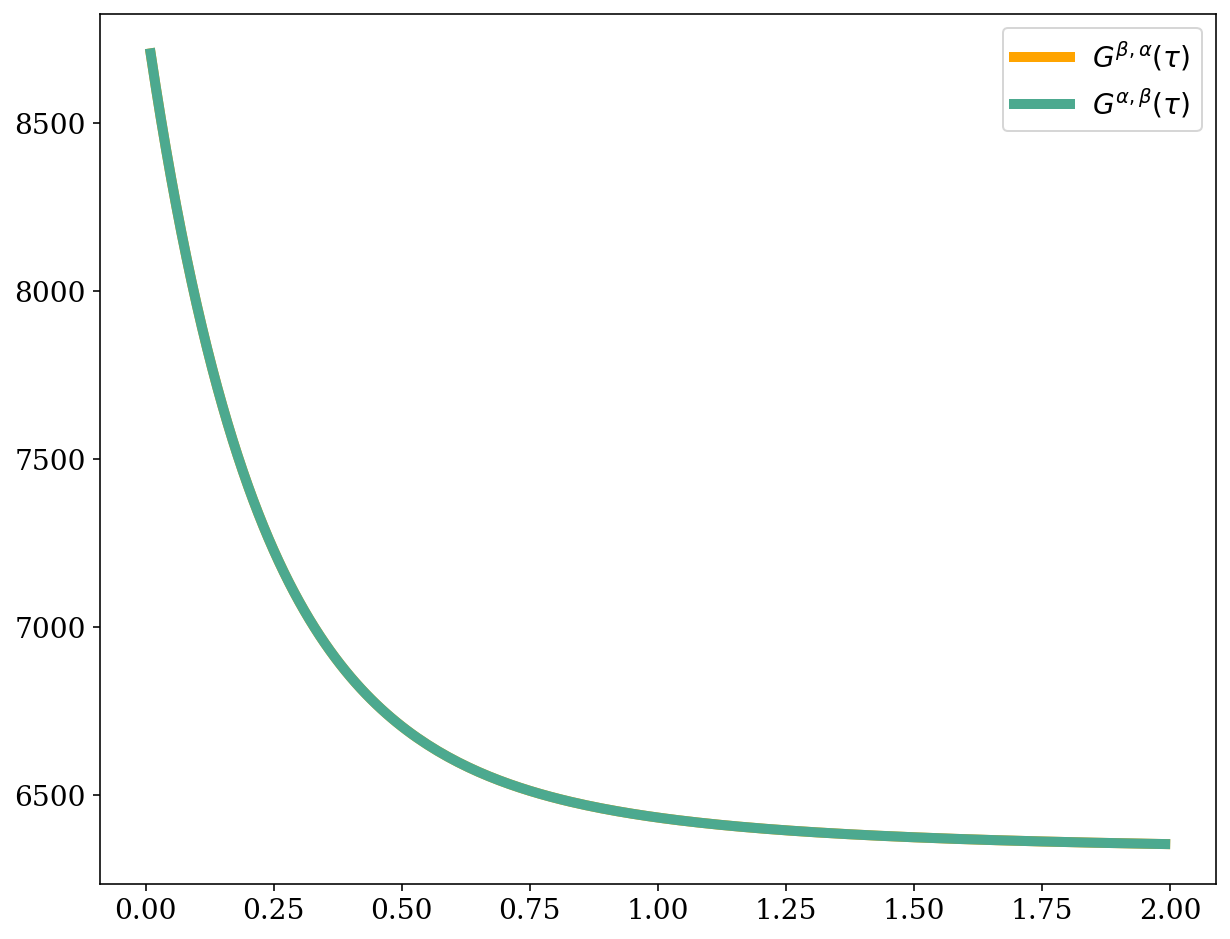

In [398]:
fig = plt.figure()
plt.plot(tau_n,t,c= '#FFA400',linewidth=5,label=r'$G^{\beta,\alpha}(\tau)$')
plt.plot(tau_n,t_rev,color='#4CA98F',linewidth=5,label=r'$G^{\alpha,\beta}(\tau)$')
plt.legend()

# 5. Calculate a force-area curve

The goal of developing this software was to determine the sensitivity of the Steinberg signature to the thermodynamic force of the underlying system.

In [399]:
N = 2000
all_affinities = np.zeros((N,num_cycles))
all_areas = np.zeros((N,1))
param_changes = np.zeros((N,1))

In [400]:
for i in tqdm(range(0,N)):
    
    # calculate affinity + record
    products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
    total_affinities = calculate_affinities(products_f,products_b,cycle_list)
    all_affinities[i] = total_affinities
    
    # calculate area + record
    label_dict, label_list = reformat_labels(cycle_list, cycle_labels_forward, edge_tracker, label_dict, label_list)
    L = Laplacian_all(edge_list,label_list,node_list)
    pi = steady_state_MTT(params)
    t, t_rev = asymmetric_autocorrelation(observable,L,tau_n,pi,alpha=1,beta=3)
    all_areas[i] = np.abs(np.trapz(t)-np.trapz(t_rev))
    
    # perturb parameter + record
    param_changes[i] = cycle_labels_forward[0][0]
    cycle_labels_forward[0][0] = cycle_labels_forward[0][0]*1.01

100%|███████████████████████████████████████| 2000/2000 [04:43<00:00,  7.05it/s]


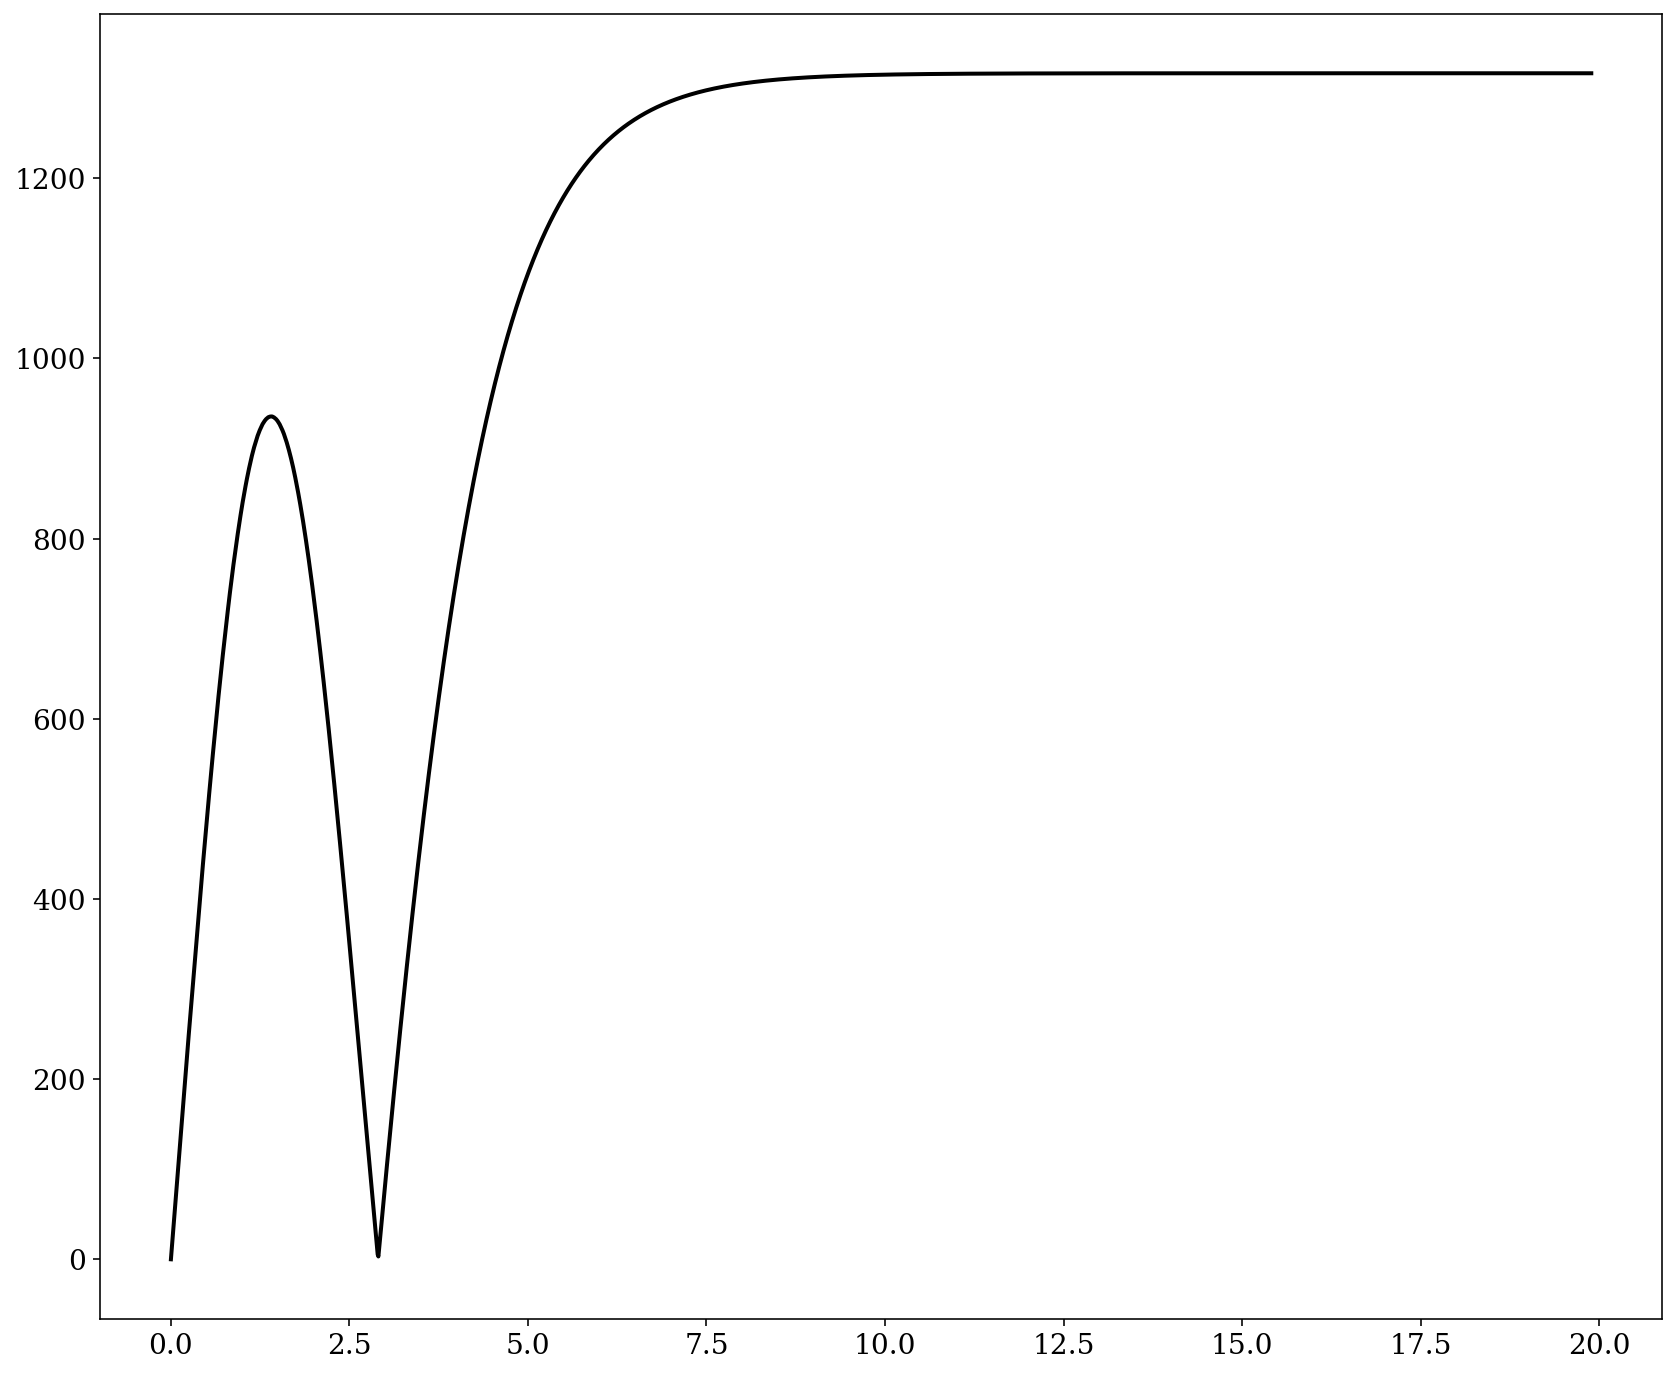

In [401]:
fig, ax = plt.subplots(figsize = (14, 12))
plt.plot(all_affinities[:,0],all_areas, linewidth=2, color = '#000000',label='cycle'+str(i))
plt.show()
fig.savefig('figure_4A.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

In [294]:
n=10
G,G_ud = random_graph(n)

In [295]:
print(G)
print(G_ud)

DiGraph with 5 nodes and 14 edges
Graph with 5 nodes and 7 edges


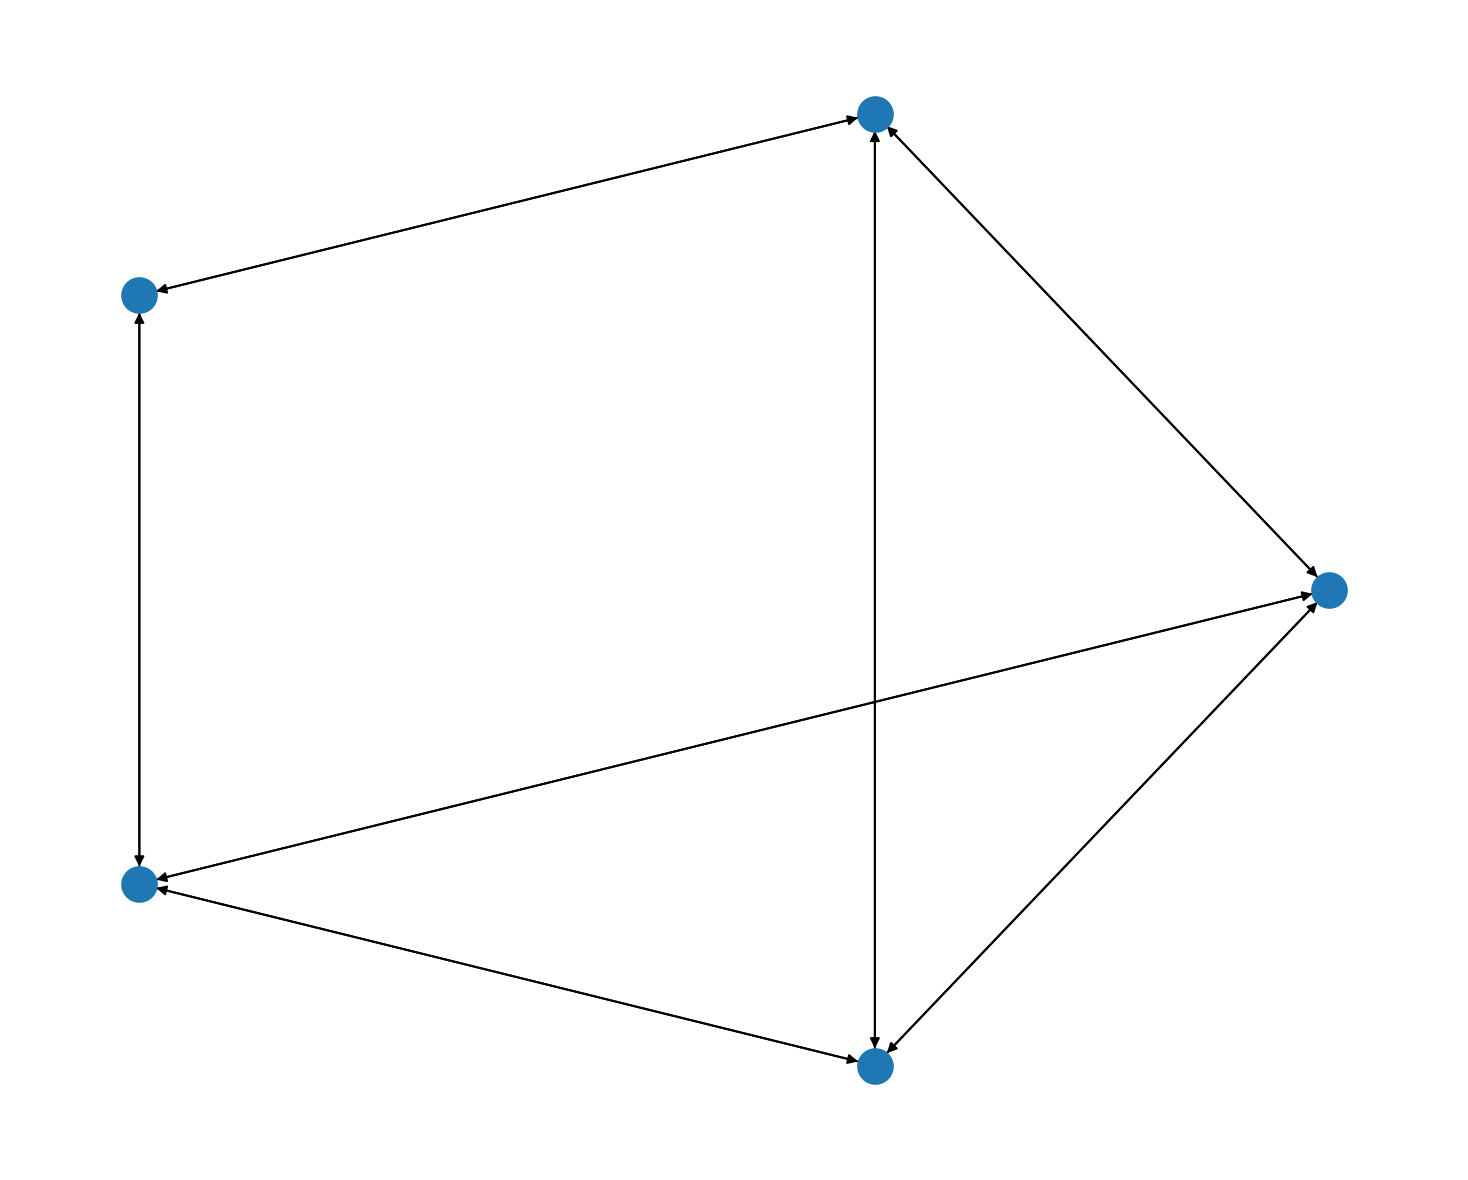

In [296]:
nx.draw(G, pos=nx.circular_layout(G))

In [297]:
node_list = get_nodes(G)
print(node_list)

[1 2 3 4 5]


In [298]:
edge_list = get_edges(G)
print(edge_list)

[[1 2]
 [1 4]
 [1 5]
 [2 5]
 [2 1]
 [2 3]
 [3 2]
 [3 4]
 [4 1]
 [4 5]
 [4 3]
 [5 4]
 [5 1]
 [5 2]]


In [299]:
label_dict, label_list = get_labels(G)

In [300]:
print(label_dict)

{(1, 2): 1.0, (1, 4): 1.0, (1, 5): 1.0, (2, 5): 1.0, (2, 1): 1.0, (2, 3): 1.0, (3, 2): 1.0, (3, 4): 1.0, (4, 1): 1.0, (4, 5): 1.0, (4, 3): 1.0, (5, 4): 1.0, (5, 1): 1.0, (5, 2): 1.0}


In [301]:
print(label_list)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [302]:
cycle_list = get_cycle_nodes(G_ud)
num_cycles = len(cycle_list)
print(cycle_list)

[[4, 5, 1], [2, 5, 1], [2, 3, 4, 1]]


In [303]:
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)

In [304]:
print(cycle_edges_forward)
print(cycle_edges_backward)

[[(4, 5), (5, 1), (1, 4)], [(2, 5), (5, 1), (1, 2)], [(2, 3), (3, 4), (4, 1), (1, 2)]]
[[(5, 4), (1, 5), (4, 1)], [(5, 2), (1, 5), (2, 1)], [(3, 2), (4, 3), (1, 4), (2, 1)]]


In [305]:
print(cycle_labels_forward)
print(cycle_labels_backward)

[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0]]
[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0]]


In [306]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)

In [307]:
print(products_f)
print(products_b)

[1. 1. 1.]
[1. 1. 1.]


In [308]:
total_affinities = calculate_affinities(products_b, products_f, cycle_list)

In [309]:
print(total_affinities)

[0. 0. 0.]


In [310]:
observable = make_observable(node_list)
print(observable)

[ 3.  5.  7.  9. 11.]


In [311]:
tau_n = np.arange(start=0.01,stop=2.0,step=0.01)

In [312]:
L = Laplacian_all(edge_list, label_list, node_list)
print(L)

[[-3.  1.  0.  1.  1.]
 [ 1. -3.  1.  0.  1.]
 [ 0.  1. -2.  1.  0.]
 [ 1.  0.  1. -3.  1.]
 [ 1.  1.  0.  1. -3.]]


In [313]:
cycle_labels_forward, edge_tracker = initial_equilibrium_parameters(cycle_list,cycle_edges_forward,cycle_labels_forward,cycle_labels_backward)

In [314]:
cycle_labels_forward

[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0]]

In [315]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[0. 0. 0.]


In [316]:
label_dict, label_list = reformat_labels(cycle_list, cycle_labels_forward, edge_tracker, label_dict, label_list)

In [317]:
L = np.around(Laplacian_all(edge_list, label_list, node_list),decimals=4)
print(L)

[[-3.  1.  0.  1.  1.]
 [ 1. -3.  1.  0.  1.]
 [ 0.  1. -2.  1.  0.]
 [ 1.  0.  1. -3.  1.]
 [ 1.  1.  0.  1. -3.]]


In [318]:
area = np.abs(np.trapz(t)-np.trapz(t_rev))
print(area)

9800.423608092667564


In [319]:
N = 2000
all_affinities = np.zeros((N,num_cycles))
all_areas = np.zeros((N,1))
param_changes = np.zeros((N,1))

In [320]:
for i in tqdm(range(0,N)):
    
    # calculate affinity + record
    products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
    total_affinities = calculate_affinities(products_f,products_b,cycle_list)
    all_affinities[i] = total_affinities
    
    # calculate area + record
    label_dict, label_list = reformat_labels(cycle_list, cycle_labels_forward, edge_tracker, label_dict, label_list)
    L = Laplacian_all(edge_list,label_list,node_list)
    pi = steady_state_MTT(params)
    t, t_rev = asymmetric_autocorrelation(observable,L,tau_n,pi,alpha=1,beta=3)
    all_areas[i] = np.abs(np.trapz(t)-np.trapz(t_rev))
    
    # perturb parameter + record
    param_changes[i] = cycle_labels_forward[0][0]
    cycle_labels_forward[0][0] = cycle_labels_forward[0][0]*1.01

100%|███████████████████████████████████████| 2000/2000 [03:45<00:00,  8.86it/s]


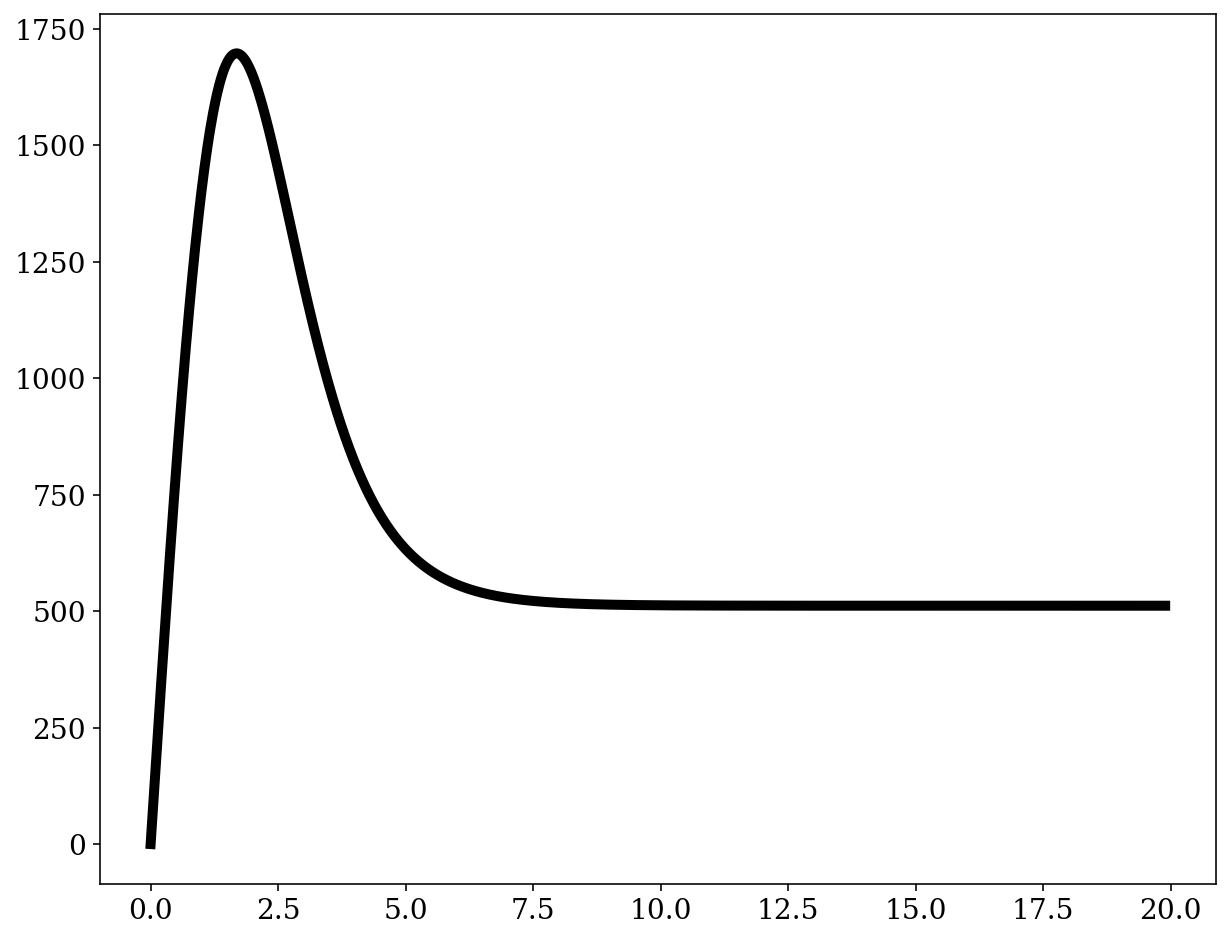

In [321]:
fig = plt.figure()
plt.plot(all_affinities[:,0],all_areas, linewidth=5, color = '#000000',label='cycle'+str(i))